In [1]:
# Importing necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE, SelectKBest,SelectFromModel,mutual_info_classif
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data = pd.read_csv('diabetes_dataset.csv')
data.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [3]:
data.shape

(100000, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

   # DATA CLEANING 

In [5]:
# Checking for missing values 
data.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [6]:
# Checking for duplicate 
duplicate = data.duplicated().sum()
duplicate

14

In [7]:
# Dropping duplicates 
data.drop_duplicates()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


# Statistical Analysis 

In [8]:
# Check the basic statistics of the data
data.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
numeric = data.select_dtypes(include='number')
numeric.skew()

year                   -1.751601
age                    -0.051979
race:AfricanAmerican    1.482709
race:Asian              1.498851
race:Caucasian          1.509744
race:Hispanic           1.508800
race:Other              1.500179
hypertension            3.231296
heart_disease           4.733872
bmi                     1.043836
hbA1c_level            -0.066854
blood_glucose_level     0.821655
diabetes                2.976217
dtype: float64

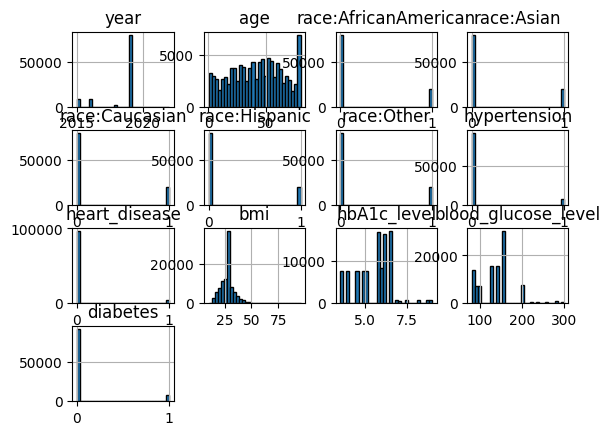

In [10]:
# Distribution of the dataset
numeric.hist(bins=30,edgecolor= 'black')
plt.show()

# Data Visualization 

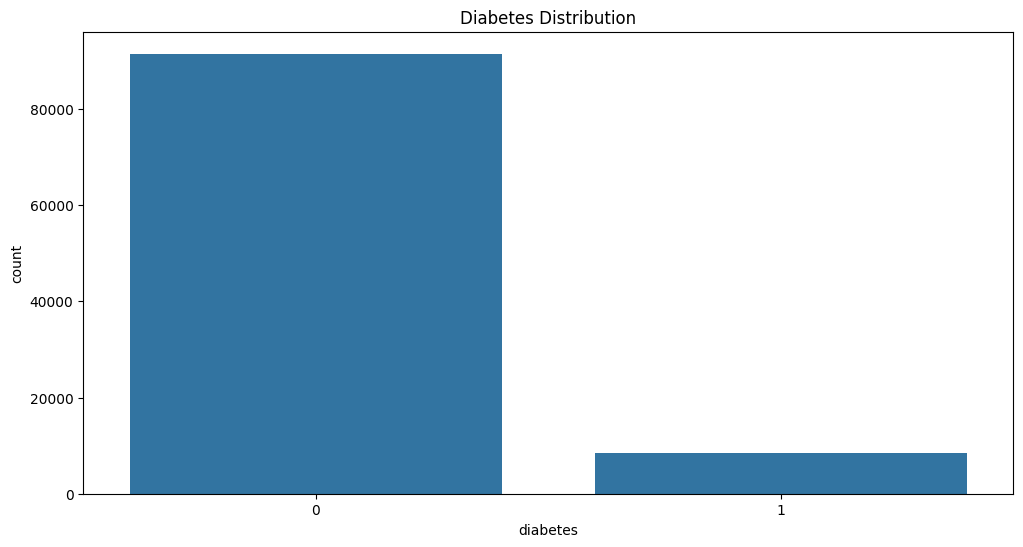

In [11]:
# Visualize the distribution of diabetes feature
plt.figure(figsize=(12, 6))
sns.countplot(x='diabetes', data=data)
plt.title('Diabetes Distribution')
plt.show()

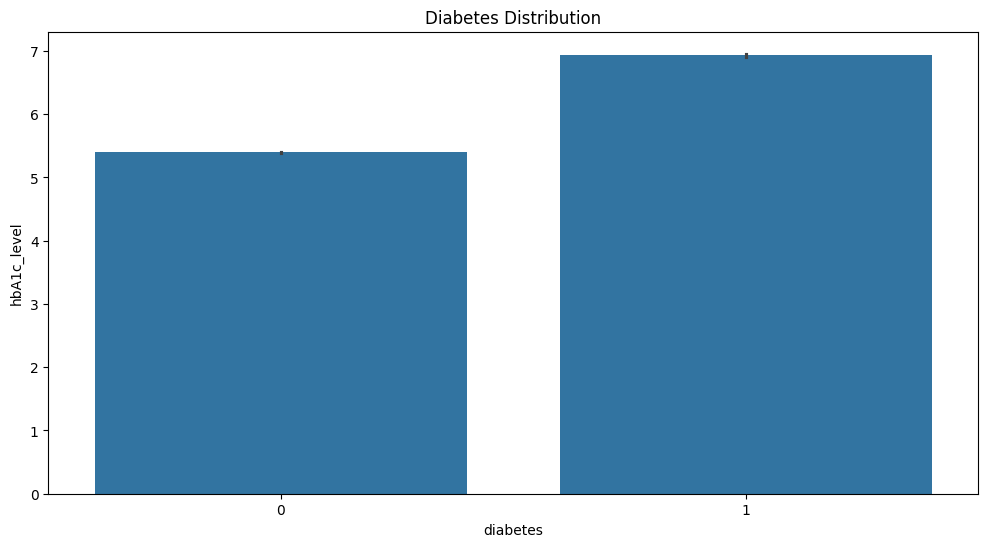

In [12]:
# Visualize relationships between diabetes and hbA1c Level
plt.figure(figsize=(12, 6))
sns.barplot(x='diabetes',y='hbA1c_level', data=data)
plt.title('Diabetes Distribution')
plt.show()

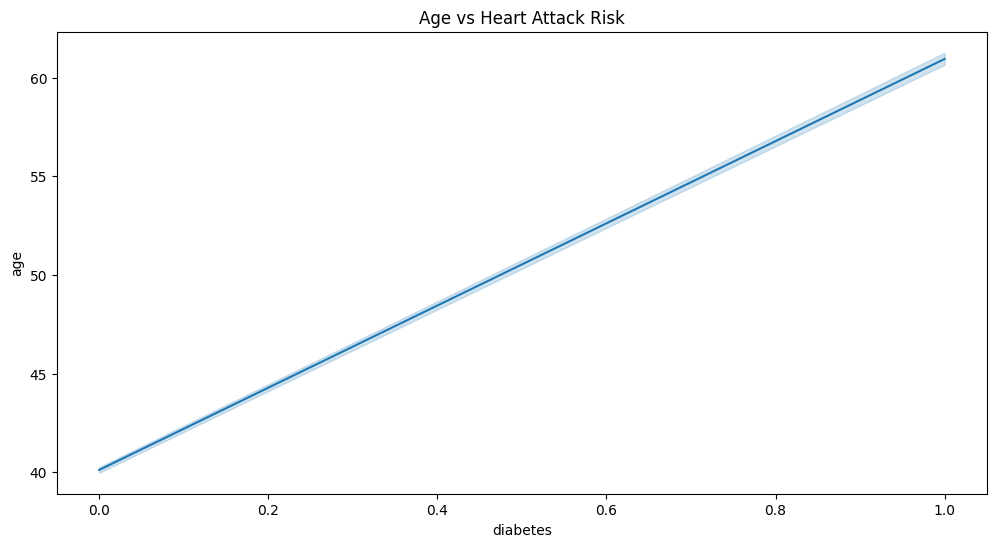

In [13]:
# Visualizing the relationship between diabetes and age
plt.figure(figsize=(12, 6))
sns.lineplot(x='diabetes', y='age', data=data)
plt.title('Age vs Heart Attack Risk')
plt.show()

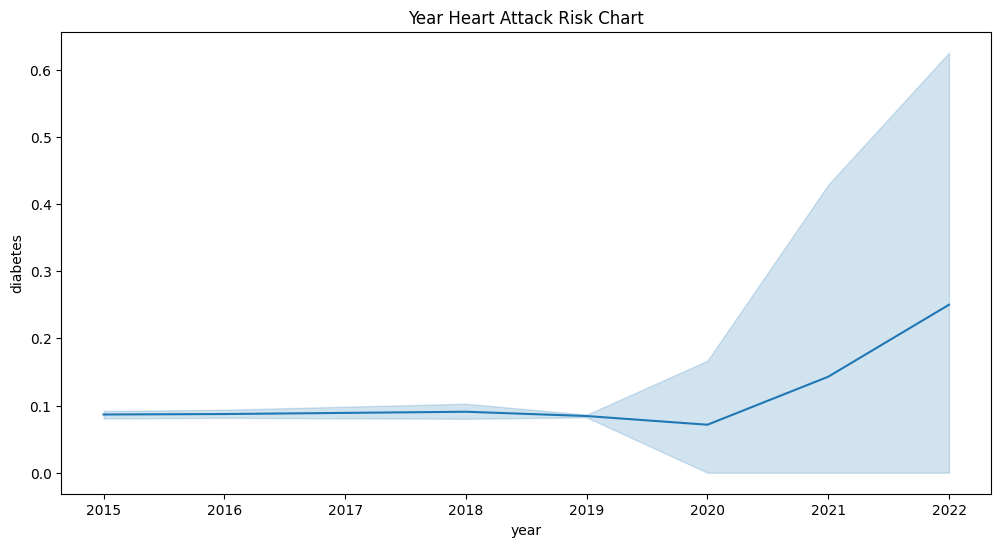

In [14]:
# Visualizing diabetic growth over time 
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='diabetes', data=data)
plt.title('Year Heart Attack Risk Chart')
plt.show()

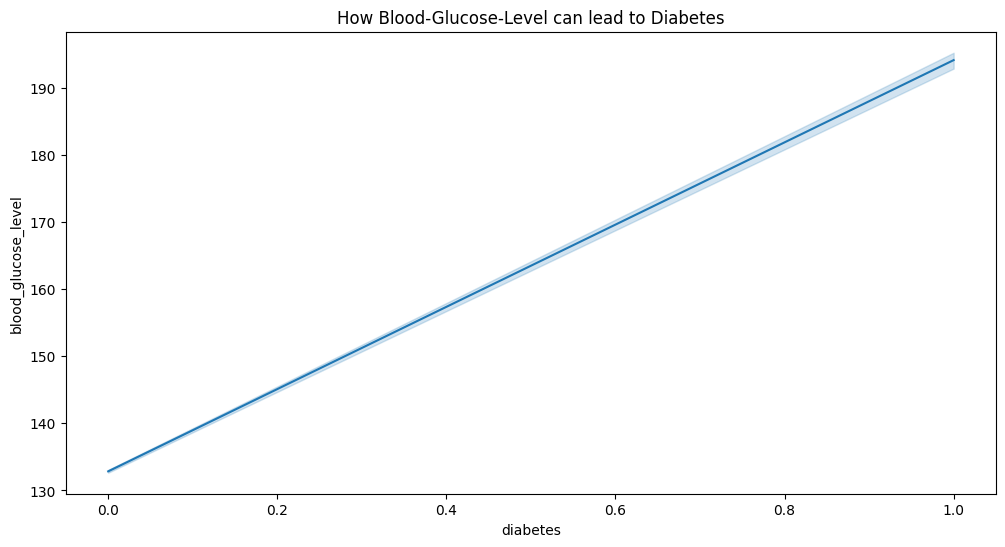

In [15]:
# Visualizing the relationship between diabetes and blood glucose level 
plt.figure(figsize=(12, 6))
sns.lineplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('How Blood-Glucose-Level can lead to Diabetes')
plt.show()

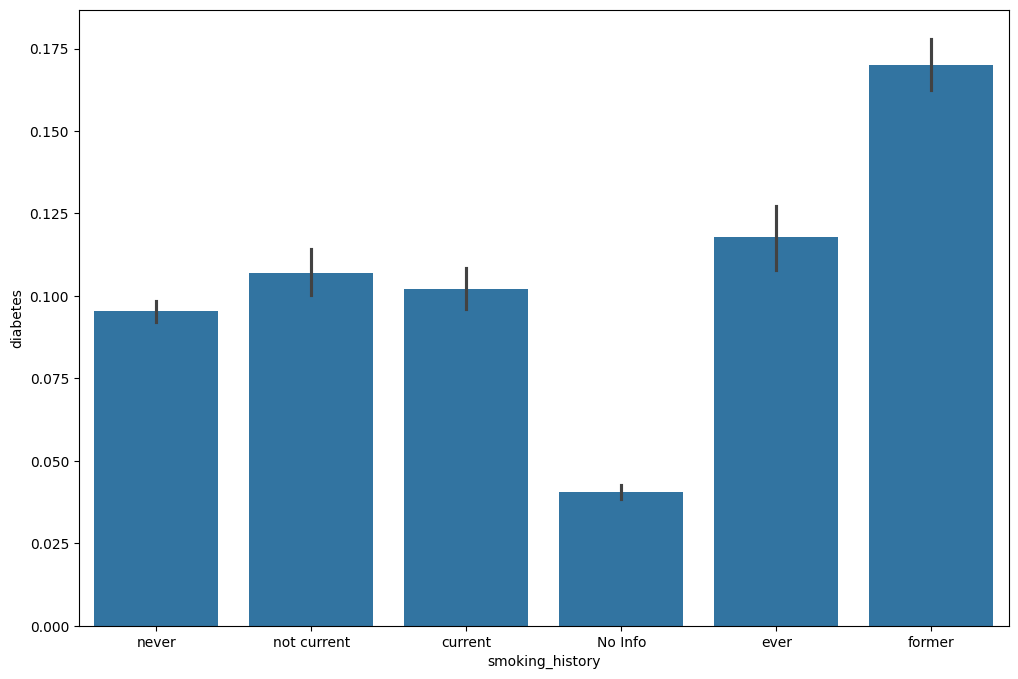

In [16]:
# Smoking effect on risk of being diabetic 
plt.figure(figsize=(12,8))
sns.barplot(x = 'smoking_history', y = 'diabetes', data=data)
plt.show()

In [ ]:
# Visualizing
gender = data.groupby('diabetes')['gender']

plt.figure(figsize=(12, 6))
sns.barplot(gender)
plt.title('Gender vs Diabetes')
plt.show()

In [ ]:
# Visualizing key features against heart attack risk
plt.figure(figsize=(12, 6))
sns.barplot(x='bmi', y='diabetes', data=data)
plt.title('BMI vs Diabetes')
plt.show()

# Features Engineering 

In [11]:
# Label coding the gender feature
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

# Label encoding the location feature
data['location'] = le.fit_transform(data['location'])

# Label encoding the smoking history feature
data['smoking_history'] = le.fit_transform(data['smoking_history'])

# Features Selection 

* 1.) Using Correlation Method since  correlation with the target variable 

In [12]:
target_corr = data.corr()['diabetes'].sort_values(ascending=False)
target_corr

diabetes                1.000000
blood_glucose_level     0.419558
hbA1c_level             0.400660
age                     0.258008
bmi                     0.214357
hypertension            0.197823
heart_disease           0.171727
smoking_history         0.094290
gender                  0.037411
race:AfricanAmerican    0.004378
race:Asian              0.003739
location               -0.000130
race:Hispanic          -0.001301
race:Caucasian         -0.001749
year                   -0.003464
race:Other             -0.005095
Name: diabetes, dtype: float64

In [13]:
# List out all the features in the dataset 
Features = pd.DataFrame(data.columns)
Features.rename(columns = {'Features':'Features'}, inplace=True)
Features 

,0
0,year
1,gender
2,age
3,location
4,race:AfricanAmerican
5,race:Asian
6,race:Caucasian
7,race:Hispanic
8,race:Other
9,hypertension


* 2) Tree-Based Features Selection 

In [14]:
# splitting the data set 
x = data.drop('diabetes',axis = 1)
y = data['diabetes']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [15]:
# Initialize model
model = RandomForestClassifier()

# Fit model
model.fit(x, y)

# Initialize SelectFromModel
selector = SelectFromModel(model)

# Fit and transform data
x_selected = selector.fit_transform(x, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

print("Selected Feature Indices:", selected_feature_indices)

Selected Feature Indices: [ 2 12 13 14]


* 3) Mutual Information Method of Features Selection 

In [16]:
# Calculate mutual information
mutual_info = mutual_info_classif(x, y)

# Select top k features
k = 5
selector = SelectKBest(mutual_info_classif, k=k)
selected_features = selector.fit_transform(x, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

print("Selected Feature Indices:", selected_feature_indices)

Selected Feature Indices: [ 2 11 12 13 14]


* 4.) Recursive Features Elimination(RFE) 

In [17]:
# Initialize the model (Logistic Regression in this case)
model = LogisticRegression()

# Initialize RFE with the desired number of features to select
rfe = RFE(model, n_features_to_select=5)  # Adjust the number based on how many features you want

# Fit RFE on the training data
rfe = rfe.fit(x_train, y_train)

# Get the selected features
selected_features_rfe = x_train.columns[rfe.support_]
print("Selected features using RFE:")
print(selected_features_rfe)

Selected features using RFE:
Index(['gender', 'hypertension', 'heart_disease', 'smoking_history',
       'hbA1c_level'],
      dtype='object')


# MODEL CREATION 

In [18]:
# Split the data into train and test sets 
X = data[['age','bmi','hbA1c_level','blood_glucose_level']]
Y = data['diabetes']

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=25)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('Y_train :', Y_train.shape)
print('Y_test :', Y_test.shape)

X_train : (80000, 4)
X_test : (20000, 4)
Y_train : (80000,)
Y_test : (20000,)


In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [21]:
def resample(X_train, Y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 42)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=42)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, Y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, Y_train)
    return X_smo, y_smo, X_under, y_under

In [22]:
# Handle class imbalance using SMOTE
x_smo,y_smo,x_under,y_under = resample(X_train,Y_train)

In [23]:
# A function to return the error matrics
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

#### 1.)   Logistic Regression 

Applying GridSearchCV on the logistic regression model to get the best hyper parameters 

In [24]:
l_model = LogisticRegression(random_state=25, max_iter = 1000)
l_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=25)

In [25]:
y_train_l = l_model.predict(X_train)
y_pred_l = l_model.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(Y_test, y_pred_l))
print("Precision:", precision_score(Y_test, y_pred_l))
print("Recall:", recall_score(Y_test, y_pred_l))
print("F1:", f1_score(Y_test, y_pred_l))

Accuracy: 0.9579
Precision: 0.8733660130718954
Recall: 0.6087699316628702
F1: 0.7174496644295303


In [27]:
train_test_log_error = pd.concat([measure_error(Y_train, y_train_l, 'train'),
                                 measure_error(Y_test, y_pred_l, 'test')],
                                axis=1)
train_test_log_error

,train,test
accuracy,0.960413,0.957900
precision,0.879321,0.873366
recall,0.614769,0.608770
f1,0.723623,0.717450


##### Using SMOTE Resampling to train a logistic Regression model

In [28]:
lr_model = LogisticRegression(random_state=25, max_iter = 1000)
lr_model.fit(x_smo,y_smo)

LogisticRegression(max_iter=1000, random_state=25)

In [29]:
y_train_lr = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_lr))
print("Precision:", precision_score(Y_test, y_pred_lr))
print("Recall:", recall_score(Y_test, y_pred_lr))
print("F1:", f1_score(Y_test, y_pred_lr))

Accuracy: 0.87675
Precision: 0.4057431534166445
Recall: 0.8690205011389521
F1: 0.5531992024651078


In [30]:
train_test_log_error = pd.concat([measure_error(Y_train, y_train_lr, 'train'),
                                 measure_error(Y_test, y_pred_lr, 'test')],
                                axis=1)
train_test_log_error

,train,test
accuracy,0.883025,0.876750
precision,0.408996,0.405743
recall,0.870996,0.869021
f1,0.556619,0.553199


##### Using the Undersampled dataset to train a logistic regression model 

In [31]:
lr_model2 = LogisticRegression(random_state=25, max_iter = 1000)
lr_model2.fit(x_under,y_under)

LogisticRegression(max_iter=1000, random_state=25)

In [32]:
y_train_lr_under = lr_model2.predict(X_train)
y_pred_lr_under = lr_model2.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_lr_under))
print("Precision:", precision_score(Y_test, y_pred_lr_under))
print("Recall:", recall_score(Y_test, y_pred_lr_under))
print("F1:", f1_score(Y_test, y_pred_lr_under))

Accuracy: 0.8734
Precision: 0.39942975635044065
Recall: 0.8775626423690205
F1: 0.5489846811542572


In [33]:
train_test_log_error = pd.concat([measure_error(Y_train, y_train_lr_under, 'train'),
                                 measure_error(Y_test, y_pred_lr_under, 'test')],
                                axis=1)
train_test_log_error

,train,test
accuracy,0.879775,0.873400
precision,0.402285,0.399430
recall,0.877224,0.877563
f1,0.551608,0.548985


##### Applying Class Weight to the imbalanced class and creating a logistic Regression model

In [34]:
class_weight = {}

# Assign weight of class 0 to be 3.4
class_weight[0] = 2.5

# Assign weight of class 1 to be 6.6
class_weight[1] = 7.5

In [35]:
# Define a logistic regression with weight
lr_model3 = LogisticRegression(random_state=25, 
                              max_iter = 1000,
                              class_weight=class_weight)
lr_model3.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 2.5, 1: 7.5}, max_iter=1000,
                   random_state=25)

In [36]:
y_train_lr_weight = lr_model3.predict(X_train)
y_pred_lr_weight = lr_model3.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_lr_weight))
print("Precision:", precision_score(Y_test, y_pred_lr_weight))
print("Recall:", recall_score(Y_test, y_pred_lr_weight))
print("F1:", f1_score(Y_test, y_pred_lr_weight))

Accuracy: 0.94135
Precision: 0.6494105586878524
Recall: 0.7215261958997722
F1: 0.6835716212570812


In [37]:
train_test_log_error = pd.concat([measure_error(Y_train, y_train_lr_weight, 'train'),
                                 measure_error(Y_test, y_pred_lr_weight, 'test')],
                                axis=1)
train_test_log_error

,train,test
accuracy,0.944675,0.941350
precision,0.653551,0.649411
recall,0.731465,0.721526
f1,0.690316,0.683572


#### 2.)   Random Forest 

In [38]:
# Pre-tuned hyper parameters
best_params_no_weight = {'bootstrap': True,
                         'class_weight':None, 
                         'max_depth': 15, 
                         'min_samples_split': 4, 
                         'n_estimators': 200,
                        'min_samples_leaf': 5}

In [39]:
r_model=RandomForestClassifier(**best_params_no_weight)

r_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=200)

In [40]:
y_train_r = r_model.predict(X_train)

y_pred_r = r_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_r))
print("Precision:", precision_score(Y_test, y_pred_r))
print("Recall:", recall_score(Y_test, y_pred_r))
print("F1:", f1_score(Y_test, y_pred_r))

Accuracy: 0.9712
Precision: 0.9916666666666667
Recall: 0.6776765375854215
F1: 0.8051420838971584


In [41]:
# Checking the error difference between the predicted train set and predicted test set
train_test_rf_error = pd.concat([measure_error(Y_train, y_train_r, 'train'),
                                 measure_error(Y_test, y_pred_r, 'test')],
                                axis=1)
train_test_rf_error

,train,test
accuracy,0.973500,0.971200
precision,0.998276,0.991667
recall,0.686833,0.677677
f1,0.813774,0.805142


###### Smote RF Model

In [42]:
rf_model=RandomForestClassifier(**best_params_no_weight)

rf_model.fit(x_smo,y_smo)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=200)

In [43]:
y_train_rf = rf_model.predict(X_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_rf))
print("Precision:", precision_score(Y_test, y_pred_rf))
print("Recall:", recall_score(Y_test, y_pred_rf))
print("F1:", f1_score(Y_test, y_pred_rf))

Accuracy: 0.9387
Precision: 0.616946160635481
Recall: 0.7961275626423691
F1: 0.6951765290900049


In [44]:
# Checking the error difference between the predicted train set and predicted test set
train_test_rf_error = pd.concat([measure_error(Y_train, y_train_rf, 'train'),
                                 measure_error(Y_test, y_pred_rf, 'test')],
                                axis=1)
train_test_rf_error

,train,test
accuracy,0.947350,0.938700
precision,0.643766,0.616946
recall,0.840599,0.796128
f1,0.729132,0.695177


###### Training the under RF model

In [45]:
rf_model2= RandomForestClassifier(**best_params_no_weight)
rf_model2.fit(x_under,y_under)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=200)

In [46]:
y_train_rf2 = rf_model2.predict(X_train)

y_pred_rf2 = rf_model2.predict(X_test)

In [47]:
print("Accuracy:", accuracy_score(Y_test, y_pred_rf2))
print("Precision:", precision_score(Y_test, y_pred_rf2))
print("Recall:", recall_score(Y_test, y_pred_rf2))
print("F1:", f1_score(Y_test, y_pred_rf2))

Accuracy: 0.8818
Precision: 0.4218508997429306
Recall: 0.9345102505694761
F1: 0.5812964930924549


In [48]:
# Checking the error difference between the predicted train set and predicted test set
train_test_rf_error = pd.concat([measure_error(Y_train, y_train_rf2, 'train'),
                                 measure_error(Y_test, y_pred_rf2, 'test')],
                                axis=1)
train_test_rf_error

,train,test
accuracy,0.890463,0.881800
precision,0.432180,0.421851
recall,0.953885,0.934510
f1,0.594850,0.581296


Adding Class Weight to the Random Forest Classifier 

In [49]:
# Pre-tuned hyper parameters
best_params_weight = {'bootstrap': True,
                         'class_weight': class_weight, 
                         'max_depth': 15, 
                         'min_samples_split': 4, 
                         'n_estimators': 200,
                        'min_samples_leaf': 5}

In [50]:
rf_model3= RandomForestClassifier(**best_params_weight)
rf_model3.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 2.5, 1: 7.5}, max_depth=15,
                       min_samples_leaf=5, min_samples_split=4,
                       n_estimators=200)

In [51]:
y_train_rf3 = rf_model3.predict(X_train)

y_pred_rf3 = rf_model3.predict(X_test)

In [52]:
print("Accuracy:", accuracy_score(Y_test, y_pred_rf3))
print("Precision:", precision_score(Y_test, y_pred_rf3))
print("Recall:", recall_score(Y_test, y_pred_rf3))
print("F1:", f1_score(Y_test, y_pred_rf3))

Accuracy: 0.9663
Precision: 0.8710562414266118
Recall: 0.7232346241457859
F1: 0.790292470441817


In [53]:
# Checking the error difference between the predicted train set and predicted test set
train_test_rf_error = pd.concat([measure_error(Y_train, y_train_rf3, 'train'),
                                 measure_error(Y_test, y_pred_rf3, 'test')],
                                axis=1)
train_test_rf_error

,train,test
accuracy,0.976100,0.966300
precision,0.924754,0.871056
recall,0.779953,0.723235
f1,0.846203,0.790292


In [54]:
data = {'Models':['Base-LR', 'Smo-LR', 'Under-LR', 'Class-LR','Base-RF','Smo-RF','Under-RF','Class-RF'],
        'Accuracy': [accuracy_score(Y_test,y_pred_l), accuracy_score(Y_test,y_pred_lr), accuracy_score(Y_test,y_pred_lr_under), accuracy_score(Y_test,y_pred_lr_weight), accuracy_score(Y_test,y_pred_r),accuracy_score(Y_test,y_pred_rf), accuracy_score(Y_test,y_pred_rf2), accuracy_score(Y_test,y_pred_rf3)],
        'Precision': [precision_score(Y_test,y_pred_l), precision_score(Y_test,y_pred_lr), precision_score(Y_test,y_pred_lr_under), precision_score(Y_test,y_pred_lr_weight), precision_score(Y_test,y_pred_r),precision_score(Y_test,y_pred_rf), precision_score(Y_test,y_pred_rf2), precision_score(Y_test,y_pred_rf3)],
        'Recall': [recall_score(Y_test,y_pred_l), recall_score(Y_test,y_pred_lr), recall_score(Y_test,y_pred_lr_under), recall_score(Y_test,y_pred_lr_weight), recall_score(Y_test,y_pred_r),recall_score(Y_test,y_pred_rf),recall_score(Y_test,y_pred_rf2),recall_score(Y_test,y_pred_rf3)],
        'f1': [f1_score(Y_test,y_pred_l), f1_score(Y_test,y_pred_lr), f1_score(Y_test,y_pred_lr_under), f1_score(Y_test,y_pred_lr_weight), f1_score(Y_test,y_pred_r),f1_score(Y_test,y_pred_rf),f1_score(Y_test,y_pred_rf2),f1_score(Y_test,y_pred_rf3)]}
data_model = pd.DataFrame(data)
data_model

,Models,Accuracy,Precision,Recall,f1
0,Base-LR,0.95790,0.873366,0.608770,0.717450
1,Smo-LR,0.87675,0.405743,0.869021,0.553199
2,Under-LR,0.87340,0.399430,0.877563,0.548985
3,Class-LR,0.94135,0.649411,0.721526,0.683572
4,Base-RF,0.97120,0.991667,0.677677,0.805142
5,Smo-RF,0.93870,0.616946,0.796128,0.695177
6,Under-RF,0.88180,0.421851,0.934510,0.581296
7,Class-RF,0.96630,0.871056,0.723235,0.790292


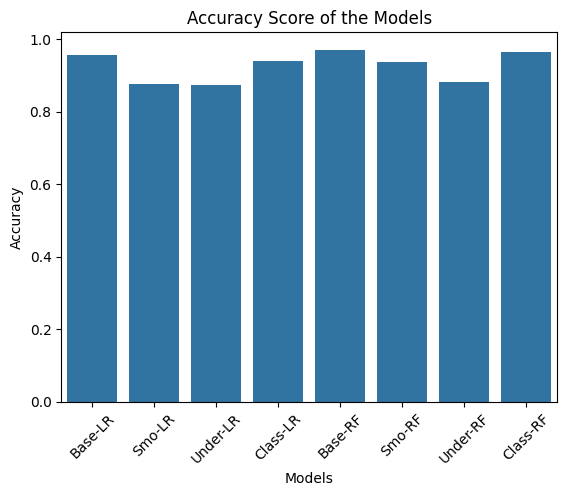

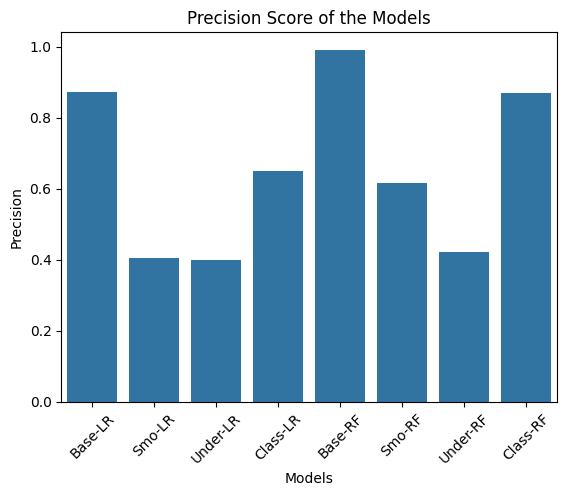

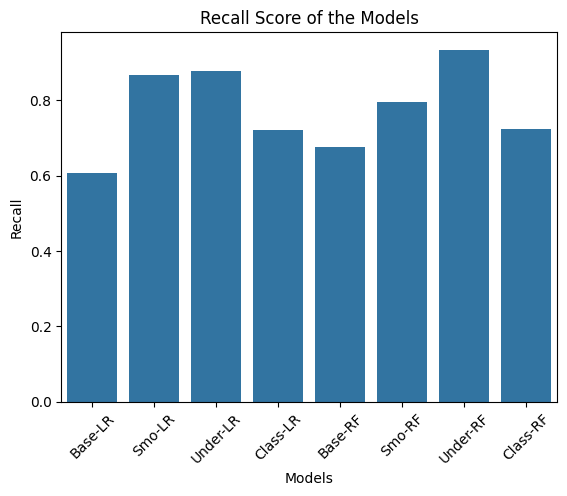

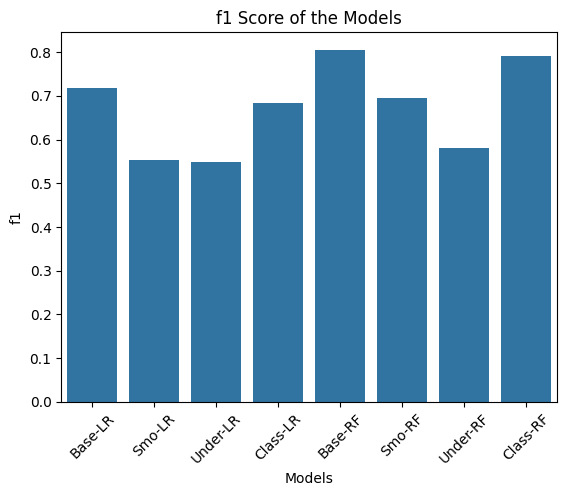

In [60]:
sns.barplot(x=data_model.Models, y = data_model.Accuracy)
plt.title('Accuracy Score of the Models')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x=data_model.Models, y = data_model.Precision)
plt.title('Precision Score of the Models')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x=data_model.Models, y = data_model.Recall)
plt.title('Recall Score of the Models')
plt.xticks(rotation=45)
plt.show()

sns.barplot(x=data_model.Models, y = data_model.f1)
plt.title('f1 Score of the Models')
plt.xticks(rotation=45)
plt.show()